# Taller Práctico Clase 4: SVM y el Poder de los Kernels

**Objetivo:** En este notebook, aplicaremos los conceptos de Máquinas de Vectores de Soporte (SVM) para resolver un problema de clasificación no lineal. Compararemos el rendimiento de SVM con diferentes kernels frente a un modelo lineal como la Regresión Logística y visualizaremos sus fronteras de decisión para desarrollar una intuición profunda sobre su funcionamiento.

**Temas a cubrir:**
1.  Generación y visualización de un dataset no lineal.
2.  Entrenamiento de un modelo de Regresión Logística como base.
3.  Entrenamiento de SVM con kernel lineal, polinómico y RBF.
4.  Visualización interactiva de las fronteras de decisión.
5.  Análisis del impacto de los hiperparámetros `C` y `gamma`.

## 1. Preparación del Entorno e Importación de Librerías

Primero, importaremos todas las librerías que necesitaremos para nuestro análisis.

In [1]:
# Manipulación de datos
import numpy as np

# Scikit-Learn para datasets, modelos y preprocesamiento
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score

# Plotly para visualizaciones interactivas
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## 2. Generación y Exploración del Dataset

Para demostrar el poder de los kernels, necesitamos un dataset que no sea linealmente separable. `make_moons` de Scikit-Learn es perfecto para esto, ya que genera dos "medias lunas" entrelazadas.

In [91]:
# Generamos el dataset
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamos las características. Es una buena práctica para SVM.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualicemos los datos de entrenamiento
fig = px.scatter(x=X_train[:, 0], y=X_train[:, 1], color=y_train.astype(str),
                 color_discrete_map={'0': 'blue', '1': 'red'},
                 title='Dataset de Entrenamiento (Moons)',
                 labels={'x': 'Característica 1', 'y': 'Característica 2'})
fig.update_layout(showlegend=False, height=600, width=800)
fig.show()

## 3. Comparación de Modelos y Fronteras de Decisión

Ahora vamos a entrenar nuestros modelos y, para cada uno, visualizaremos la frontera de decisión que aprende. Para ello, crearemos una función auxiliar que nos facilite el ploteo.

In [92]:
"""
    Plotea con los datos de train y con eso calcula el accuracy. Para ver si hay overfitting hay que usar los datos de testo y no los de train
"""
def plot_decision_boundary(model, X, y, title):
    """Función para visualizar la frontera de decisión de un modelo de clasificación en 2D."""
    # Creamos una malla de puntos para evaluar el modelo
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predecimos sobre cada punto de la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Creamos la figura
    fig = go.Figure()

    # Añadimos la superficie de decisión (contour plot)
    fig.add_trace(go.Contour(
        x=xx[0], y=yy[:, 0],
        z=Z, showscale=False,
        colorscale=['rgba(0,0,255,0.2)', 'rgba(255,0,0,0.2)'],
        line_width=0
    ))

    # Añadimos los puntos de datos
    fig.add_trace(go.Scatter(
        x=X[:, 0], y=X[:, 1], mode='markers',
        marker=dict(color=y, colorscale=['blue', 'red'], line=dict(width=1, color='DarkSlateGrey')),
        showlegend=False
    ))

    # Calculamos la precisión (accuracy)
    y_pred = model.predict(X)

    acc= accuracy_score(y, y_pred)
    precision=precision_score(y,y_pred)


    fig.update_layout(title=f'{title}<br>Accuracy: {acc:.4f} Precision: {precision:.4f}',
                      xaxis_title='Característica 1 (escalada)',
                      yaxis_title='Característica 2 (escalada)',
                      height=600, width=800,)
    return fig

### 3.1. Regresión Logística (Modelo Base)

In [93]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
fig = plot_decision_boundary(log_reg, X_train, y_train, 'Regresión Logística')
fig.show()

Como era de esperar, la Regresión Logística intenta separar los datos con una línea recta, fallando en capturar la estructura curva de las "lunas".

### 3.2. SVM con Kernel Lineal

In [5]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
fig = plot_decision_boundary(svm_linear, X_train, y_train, 'SVM con Kernel Lineal')
fig.show()

El SVM lineal produce un resultado muy similar a la Regresión Logística. Ambos son modelos lineales y, por lo tanto, inadecuados para este problema.

### 3.3. SVM con Kernel Polinómico

In [6]:
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)
fig = plot_decision_boundary(svm_poly, X_train, y_train, 'SVM con Kernel Polinómico (grado 3)')
fig.show()

¡Mucho mejor! El kernel polinómico puede crear una frontera curva que se adapta mucho mejor a la forma de los datos. La precisión mejora un poco.

### 3.4. SVM con Kernel RBF (Radial Basis Function)

In [7]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
fig = plot_decision_boundary(svm_rbf, X_train, y_train, 'SVM con Kernel RBF')
fig.show()

El kernel RBF, que es el más flexible y popular, logra la mejor separación. Crea una frontera suave y compleja que se ajusta casi perfectamente a la estructura de los datos, logrando la mayor precisión.

## 4. El Impacto de los Hiperparámetros `C` y `gamma`

En SVM, `C` y `gamma` (para el kernel RBF) son cruciales. Vamos a visualizar su efecto.

- **`C` (Parámetro de regularización):** Controla el trade-off entre un margen ancho y clasificar correctamente todos los puntos. Un `C` bajo crea un margen más ancho pero permite más violaciones (más simple, más sesgo). Un `C` alto crea un margen más estrecho, intentando clasificar todo correctamente (más complejo, más varianza).
- **`gamma`:** Define la influencia de un único ejemplo de entrenamiento. Un `gamma` bajo significa que un punto tiene una influencia lejana (frontera más suave). Un `gamma` alto significa que un punto tiene una influencia muy local (frontera puede ser muy irregular).

In [8]:
# Creamos una figura con subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    "Bajo Gamma, Bajo C", "Alto Gamma, Bajo C",
    "Bajo Gamma, Alto C", "Alto Gamma, Alto C"
))

hyperparams = [(0.1, 1), (20, 1), (0.1, 2000), (20, 2000)]
plot_positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for (gamma, C), pos in zip(hyperparams, plot_positions):
    # Entrenar modelo
    svm = SVC(kernel='rbf', gamma=gamma, C=C)
    svm.fit(X_train, y_train)
    
    # Crear malla
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # Predecir en la malla
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Añadir trazas a la sub-figura
    fig.add_trace(go.Contour(x=xx[0], y=yy[:, 0], z=Z, showscale=False, colorscale=['rgba(0,0,255,0.2)', 'rgba(255,0,0,0.2)'], line_width=0), row=pos[0], col=pos[1])
    fig.add_trace(go.Scatter(x=X_train[:, 0], y=X_train[:, 1], mode='markers', marker=dict(color=y_train, colorscale=['blue', 'red'])), row=pos[0], col=pos[1])

fig.update_layout(height=800, width=800, title_text="Efecto de Hiperparámetros C y Gamma en Kernel RBF", showlegend=False)
fig.show()

## 5. Desafíos

1.  **Evaluar en el conjunto de test:** Todos los `accuracy` se calcularon sobre los datos de entrenamiento para visualizar el ajuste. Calcula la precisión de los 4 modelos principales (LogReg, SVM Lineal, Polinómico, RBF con valores por defecto) en el conjunto de `X_test`, `y_test`. ¿Cuál generaliza mejor?
2.  **Probar otros datasets:** Importa el dataset de `make_circles` de `sklearn.datasets`. ¿Cómo se comportan los diferentes kernels en este caso? ¿Y con `make_blobs` con 3 centros?
3.  **Ajuste fino:** Usando los plots de la sección 4 como guía, intenta encontrar "a mano" una combinación de `C` y `gamma` que te parezca que da el mejor resultado (un buen balance entre ajuste y suavidad de la frontera).

## 6. Ejercicios Propuestos

1.  **Interpretación del Margen:** En el SVM con kernel lineal, ¿cómo podrías identificar visualmente cuáles son los vectores de soporte? (Pista: son los puntos más cercanos a la línea de separación).

2.  **Kernel Polinómico y Grado:** Modifica el grado `degree` del `SVC(kernel='poly', ...)` a 1, 2, 5 y 10. Describe cómo cambia la complejidad de la frontera de decisión y el riesgo de sobreajuste (overfitting).

3.  **El rol de `coef0`:** En el kernel polinómico, el parámetro `coef0` controla cuánto influyen los polinomios de grado alto vs. los de grado bajo. Investiga y experimenta con este parámetro. ¿Qué efecto tiene en la frontera de decisión?

4.  **SVM para Regresión (SVR):** La librería `sklearn.svm` también contiene `SVR`. Investiga cómo funciona SVR. A diferencia de SVM para clasificación que intenta poner una "calle" vacía entre clases, SVR intenta que la mayor cantidad de puntos queden *dentro* de la "calle". Aplica SVR a un dataset de regresión simple.

5.  **Coste Computacional:** Aumenta el número de muestras en `make_moons` a 5000 y luego a 20000. Mide el tiempo de entrenamiento de la Regresión Logística y del SVM con kernel RBF usando `%%timeit` en la celda. ¿Qué observas sobre la escalabilidad de SVM?

6.  **Importancia del Escalado:** Vuelve a ejecutar el notebook pero esta vez, comenta las líneas donde se usa `StandardScaler`. ¿Qué impacto tiene en el rendimiento del SVM, especialmente con kernel RBF? ¿Por qué crees que ocurre esto? (Pista: el kernel RBF depende de distancias).

7.  **Creando un Kernel Personalizado:** La clase `SVC` de Scikit-Learn permite pasar una función como kernel. Define una función en Python que reciba dos vectores `X1` y `X2` y devuelva su producto punto (kernel lineal). Úsala para entrenar un SVM: `SVC(kernel=mi_kernel_lineal)`. Obs: el parametro debe ser una "callable" que reciba dos arrays y devuelva un escalar. ¿Cómo se compara con el SVM lineal de Scikit-Learn?

8.  **El parámetro `C` a fondo:** Crea un bucle que entrene varios SVM con kernel lineal pero con valores de `C` muy diferentes (ej. 0.01, 1, 100, 10000). Para cada uno, imprime el número de vectores de soporte (`model.n_support_`). ¿Qué relación observas entre el valor de `C` y la cantidad de vectores de soporte?

9.  **Aplicación a un problema real:** Carga el dataset de cáncer de mama de sklearn (`load_breast_cancer`). Como es un dataset con muchas características, no podrás visualizar la frontera de decisión. En su lugar, usa `GridSearchCV` de `sklearn.model_selection` para encontrar la mejor combinación de `C` y `gamma` para un SVM con kernel RBF. Compara su `accuracy` en el conjunto de test con el de una Regresión Logística.

## 5 Desafio

### Evaluamos en el conjunto de test

In [9]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
fig = plot_decision_boundary(log_reg, X_test, y_test, 'Regresión Logística')
fig.show()

### svm con kernel

In [10]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
fig = plot_decision_boundary(svm_linear, X_test, y_test, 'SVM con Kernel Lineal')
fig.show()

### SVM con kernel polinómico

In [11]:
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)
fig = plot_decision_boundary(svm_poly, X_test, y_test, 'SVM con Kernel Polinómico (grado 3)')
fig.show()

### SVM con Kernel RBF

In [12]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
fig = plot_decision_boundary(svm_rbf, X_test, y_test, 'SVM con Kernel RBF')
fig.show()

### Ejercicio 6.1
 **Interpretación del Margen:** En el SVM con kernel lineal, ¿cómo podrías identificar visualmente cuáles son los vectores de soporte? (Pista: son los puntos más cercanos a la línea de separación).

La linea de separación divide dos grupos, los vectores de soporte dan el margen de error que puedo tener, entonces las lineas de soporte deben estar pararleas a la linea de separacion y cercanas a un punto celeste (hacia abajo) y un punto rojo (hacia arriba) y equidistantes entre con la linea media.
Entonces los vectores de soporte son los puntos del origen a estos que estan por debajo y por arriba de la linea de separación

![image](./vectores_soporte.png)

In [13]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
fig = plot_decision_boundary(svm_linear, X_train, y_train, 'SVM con Kernel Lineal')
fig.show()


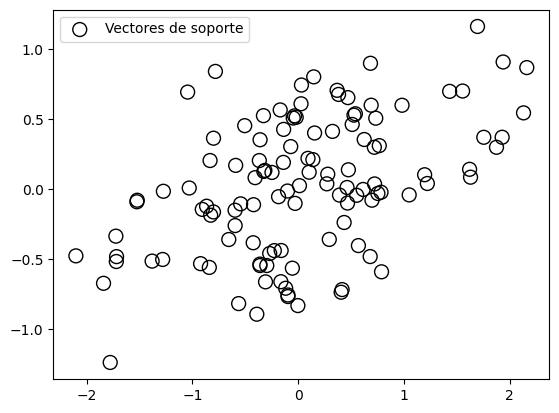

In [14]:
import matplotlib.pyplot as plt
# Agregar los vectores de soporte
plt.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Vectores de soporte')
plt.legend()
plt.show()

### 6.2.  **Kernel Polinómico y Grado:** Modifica el grado `degree` del `SVC(kernel='poly', ...)` a 1, 2, 5 y 10. Describe cómo cambia la complejidad de la frontera de decisión y el riesgo de sobreajuste (overfitting).

In [22]:
svm_poly = SVC(kernel='poly', degree=10, random_state=42)
svm_poly.fit(X_train, y_train)
fig = plot_decision_boundary(svm_poly, X_train, y_train, 'SVM con Kernel Polinómico (grado 3)')
fig.show()

La frontera se va hajustando mas a los puntos, pero ya para un grado de 10 el entrenamiento ya se vuelve malo. En términos de overfitting lo que pasaría es que cuando haga las predicciones estan va a ser malas porque el modelo esta entrenado muy "justo" para los datos de test

### 6.3.  **El rol de `coef0`:** En el kernel polinómico, el parámetro `coef0` controla cuánto influyen los polinomios de grado alto vs. los de grado bajo. Investiga y experimenta con este parámetro. ¿Qué efecto tiene en la frontera de decisión?


In [41]:
pol_degree=10
svm_poly = SVC(kernel='poly', degree=4, random_state=42,coef0=10)
svm_poly.fit(X_train, y_train)
fig = plot_decision_boundary(svm_poly, X_train, y_train, 'SVM con Kernel Polinómico (grado '+str(pol_degree)+')')
fig.show()


A medida que coef0 aumenta mejor se ajusta el polinomio a la figura, si coef0 es mayor al grado de polinomio no tiene efecto

### 6.4.  **SVM para Regresión (SVR):** La librería `sklearn.svm` también contiene `SVR`. Investiga cómo funciona SVR. A diferencia de SVM para clasificación que intenta poner una "calle" vacía entre clases, SVR intenta que la mayor cantidad de puntos queden *dentro* de la "calle". Aplica SVR a un dataset de regresión simple.


In [ ]:
# Aca hay un tema con el scalamiento, en todos los ejemplos anteriores no se escalo Y pero es posible que sea conveniente. 
# en este caso como y son 0 y 1 no hay que escalar. 
# Si los valores de Y varian mucho hay que hacer feature scaling tambien. 

from sklearn.svm import SVR
import pandas as pd 

dataset = pd.read_csv('Position_Salaries.csv')
X_svm = dataset.iloc[:, 1:-1].values
y_svm= dataset.iloc[:, -1].values

sc_X=StandardScaler()
sc_Y=StandardScaler()


X_svm=sc_X.fit_transform(X_svm)
y_svm=y_svm.reshape(len(y_svm),1)
y_svm=sc_Y.fit_transform(y_svm)

regressor = SVR(kernel = 'rbf') #radial basis function kernel
regressor.fit(X_svm, y_svm)




/opt/anaconda3/envs/islp/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

/var/folders/jr/t_k402pj3bg57t7p56rgmknr0000gn/T/ipykernel_56969/3699934383.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



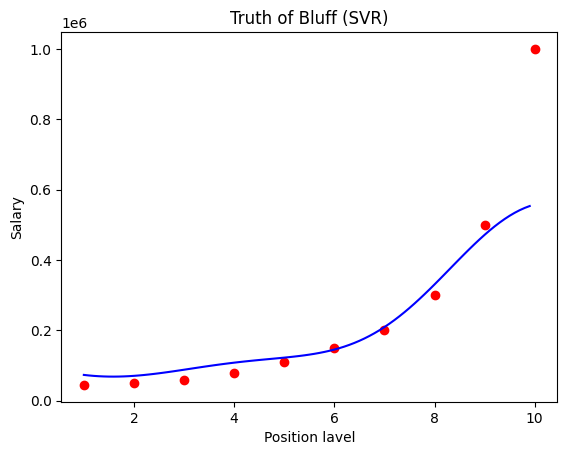

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

In [90]:

X_grid=np.arange(min(sc_X.inverse_transform(X_svm)),max(sc_X.inverse_transform(X_svm)),0.1) # Agrego mas puntos a las x para mas resolucion
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X_svm),sc_Y.inverse_transform(y_svm),color='red')
plt.plot(X_grid,sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')
plt.title("Truth of Bluff (SVR)")
plt.xlabel('Position lavel')
plt.ylabel('Salary')
plt.show()
display(sc_Y.inverse_transform(regressor.predict(X_svm).reshape(-1,1)))

### 6.5.  **Coste Computacional:** Aumenta el número de muestras en `make_moons` a 5000 y luego a 20000. Mide el tiempo de entrenamiento de la Regresión Logística y del SVM con kernel RBF usando `%%timeit` en la celda. ¿Qué observas sobre la escalabilidad de SVM?


In [102]:
# Generamos el dataset
X, y = make_moons(n_samples=5000, noise=0.25, random_state=42)

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamos las características. Es una buena práctica para SVM.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





In [103]:

%%timeit
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

935 μs ± 16.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [104]:
%%timeit

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

22.2 ms ± 86.3 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [105]:
# Generamos el dataset
X, y = make_moons(n_samples=20000, noise=0.25, random_state=42)

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamos las características. Es una buena práctica para SVM.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
%%timeit
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

4.95 ms ± 991 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [107]:
%%timeit

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

354 ms ± 6.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### En temas des escalabilidad es mucho mejor la logística porqu pasa a multipllicarse por 5 el tiempo cuando con SVM se multiplica por 16

### 6.6.  **Importancia del Escalado:** Vuelve a ejecutar el notebook pero esta vez, comenta las líneas donde se usa `StandardScaler`. ¿Qué impacto tiene en el rendimiento del SVM, especialmente con kernel RBF? ¿Por qué crees que ocurre esto? (Pista: el kernel RBF depende de distancias).


In [117]:
# Generamos el dataset
X, y = make_moons(n_samples=5000, noise=0.25, random_state=42)

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [118]:

%%timeit

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)




952 μs ± 25.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [112]:
%%timeit

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)




21.1 ms ± 139 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [119]:
# Generamos el dataset
X, y = make_moons(n_samples=20000, noise=0.25, random_state=42)

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)






In [124]:
%%timeit

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)


724 ms ± 5.72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [125]:
fig = plot_decision_boundary(svm_linear, X_train, y_train, 'Regresión Logística')
fig.show()

In [121]:
%%timeit

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

349 ms ± 4.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [123]:
fig = plot_decision_boundary(svm_rbf, X_train, y_train, 'SVM con Kernel RBF')
fig.show()

#### En la logistic regression el tiempo fue de un 50% mas pero en la rbf casi no cambio. En cambio en términos de accuracy y precision con la lineal no hubo tanta diferencia pero sin embargo con rbf el cambio fue significativo.
Esto se da, como bien sugiere la pregunta, porque con el kernel RBF se ajusta por la distancia de los puntos: $$K(x,x 
′
 )=exp(−γ∥x−x 
′
 ∥ 
^2
 )$$ 

 Al no escalar esas distancias son numericamente muy grandes y se vuelven mas significativas, algunos features las distancias seran 0.1 o otros 1000 aunque en proporción sean igual de significativas.

### 6.7.  **Creando un Kernel Personalizado:** La clase `SVC` de Scikit-Learn permite pasar una función como kernel. Define una función en Python que reciba dos vectores `X1` y `X2` y devuelva su producto punto (kernel lineal). Úsala para entrenar un SVM: `SVC(kernel=mi_kernel_lineal)`. Obs: el parametro debe ser una "callable" que reciba dos arrays y devuelva un escalar. ¿Cómo se compara con el SVM lineal de Scikit-Learn?


In [ ]:
def func_dot_product(X1,X2):
    return np.dot(X1,X2)


11


In [128]:
def func_dot_product(X1, X2):
	return np.dot(X1, X2.T)

svc_custom = SVC(kernel=func_dot_product, random_state=42)
svc_custom.fit(X_train, y_train)
fig = plot_decision_boundary(svc_custom, X_train, y_train, 'SVM con Kernel Lineal (custom kernel)')
fig.show()

#### En este caso mejora un poco respecto de la linear tanto el accuracy como precisión

### 6.8.  **El parámetro `C` a fondo:** Crea un bucle que entrene varios SVM con kernel lineal pero con valores de `C` muy diferentes (ej. 0.01, 1, 100, 10000). Para cada uno, imprime el número de vectores de soporte (`model.n_support_`). ¿Qué relación observas entre el valor de `C` y la cantidad de vectores de soporte?


In [136]:
# Generamos el dataset
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamos las características. Es una buena práctica para SVM.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [141]:
c_values=[0.01,1,100,10000]
for c_value in c_values:
    svm_linear = SVC(kernel='linear', random_state=42,C=c_value)
    svm_linear.fit(X_train, y_train)
    fig = plot_decision_boundary(svm_linear, X_train, y_train, 'SVM con Kernel Lineal')
    fig.show()
    leyend='C= '+str(c_value)+' # support vectors'+str(svm_linear.n_support_)
    display (leyend)


'C= 0.01 # support vectors[103 103]'

'C= 1 # support vectors[59 58]'

'C= 100 # support vectors[58 57]'

'C= 10000 # support vectors[58 57]'

#### A medida que c aumenta la cantidad de vectores parece disminuir, pero se queda cte luego de c=1

### 6.9.  **Aplicación a un problema real:** Carga el dataset de cáncer de mama de sklearn (`load_breast_cancer`). Como es un dataset con muchas características, no podrás visualizar la frontera de decisión. En su lugar, usa `GridSearchCV` de `sklearn.model_selection` para encontrar la mejor combinación de `C` y `gamma` para un SVM con kernel RBF. Compara su `accuracy` en el conjunto de test con el de una Regresión Logística.

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  radius error  texture error  perimeter error  \
0                   0.07871        1.0950         0.9053            8.589   
1                   0.05667        0.5435         0.7339            3.398   
2                   0.05999        0.7456         0.7869            4.585   
3                   0.09744        0.4956         1.1560            3.445   
4                   0.05883        0.7572         0.7813            5.438   
..                      ...           ...            ...              ...   
564                 0.05623        1.1760         1.2560            7.673   
565                 0.05533        0.7655         2.4630            5.203   
566                 0.05648        0.4564         1.0750            3.425   
567                 0.07016        0.7260         1.5950            5.772   
568                 0.05884        0.3857         1.4280            2.548   

     area error  smoothness error  compactness error  concavity error  \
0        153.40          0.006399            0.04904          0.05373   
1         74.08          0.005225            0.01308          0.01860   
2         94.03          0.006150            0.04006          0.03832   
3         27.23          0.009110            0.07458          0.05661   
4         94.44          0.011490            0.02461          0.05688   
..          ...               ...                ...              ...   
564      158.70          0.010300            0.02891          0.05198   
565       99.04          0.005769            0.02423          0.03950   
566       48.55          0.005903            0.03731          0.04730   
567       86.22          0.006522            0.06158          0.07117   
568       19.15          0.007189            0.00466          0.00000   

     concave points error  symmetry error  fractal dimension error  \
0                 0.01587         0.03003                 0.006193   
1                 0.01340         0.01389                 0.003532   
2                 0.02058         0.02250                 0.004571   
3                 0.01867         0.05963                 0.0

hay categorizados como No cancer: 212 casos
hay categorizados como Cancer: 357 casos


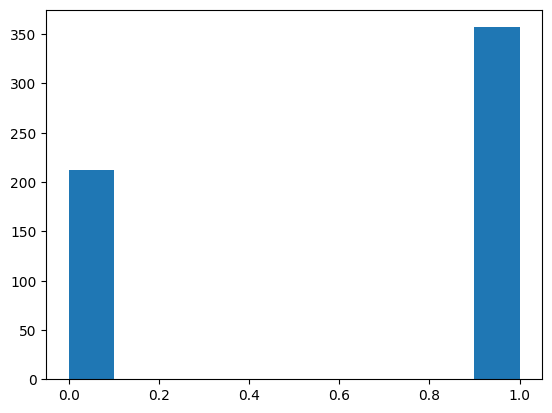

In [142]:
from sklearn.datasets import load_breast_cancer

breast_cancer_df,target=load_breast_cancer(return_X_y=True,as_frame=True)

columns_names=breast_cancer_df.columns
print(columns_names)

pd.set_option('display.max_columns', None)

display(breast_cancer_df)
print(f'hay categorizados como No cancer: {(target == 0).sum()} casos')
print(f'hay categorizados como Cancer: {(target == 1).sum()} casos')

plt.figure()
plt.hist(target,)
plt.show()

In [146]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

svm_linear_grid = SVC(kernel='rbf', random_state=42)

grid =GridSearchCV(svm_linear_grid,param_grid,cv=5)
grid.fit(X_train_scaled,y_train)

best_svm = grid.best_estimator_
svm_pred = best_svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)


## ahora entrenamos para una regresion logística: 
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_reg_preds=log_reg.predict(X_test_scaled)
log_reg_acc=accuracy_score(y_test,log_reg_preds)

print(f'accuracy svm_liner_grid: {svm_acc}')
print(f'accuracy log_reg: {log_reg_acc}')



accuracy svm_liner_grid: 0.9666666666666667
accuracy log_reg: 0.86
